# Demonstration of API using OpenWeather.org
This demonstration is heavily inspired by NeuralNine's video: https://www.youtube.com/watch?v=9P5MY_2i7K8.  
The VS Code extensino _JSON viewer_ is recommended for viewing downloaded JSON content.

In [24]:
# Imports
import datetime as dt
import requests
import json

## Common definitions to use for all requests
### Current weather

In [25]:
BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
API_KEY = open('../../No_sync/api_key','r').read()
CITY = "Ski"

url = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

## Request current weather in chosen city

In [26]:
response = requests.get(url).json()
# print(response)

In [27]:
# Write JSON to file for viewing
with open('downloads/weather.json', 'w') as f:
    json.dump(response, f, indent=4)

## Conversion functions

In [28]:
# Kelvin to Celsius
def kelvin_to_celsius(temp):
    return temp - 273.15

# Meters per second to knots
def mps_to_knots(speed):
    return speed * 1.943844

## Print some weather properties

In [29]:
# Current temperature
temp_kelvin = response['main']['temp']
temp_celsius = kelvin_to_celsius(temp_kelvin)
print(f"The current temperature in {CITY} is {temp_celsius:.2f}°C")

The current temperature in Ski is 2.47°C


In [30]:
# Sunrise and sunset today in local time
sunrise = dt.datetime.fromtimestamp(response['sys']['sunrise'])
sunset = dt.datetime.fromtimestamp(response['sys']['sunset'])
print(f"Sunrise today is at {sunrise:%H:%M} and sunset is at {sunset:%H:%M}")

Sunrise today is at 06:55 and sunset is at 19:47


## Common definitions to use for all requests
### Forecasted weather

In [31]:
BASE_URL = "http://api.openweathermap.org/data/2.5/forecast?"
API_KEY = open('../../No_sync/api_key','r').read()
CITY = "Ski"

urlF = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

## Request current weather in chosen city

In [32]:
responseF = requests.get(urlF).json()
# print(responseF)

In [33]:
# Write JSON to file for viewing
with open('downloads/forecast.json', 'w') as f:
    json.dump(responseF, f, indent=4)

### When and what?
Check contents and time stamps

In [34]:
# Content of responseF
responseF.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [35]:
# Number of forecasts
print(len(responseF["list"]))

40


In [36]:
# Print forecast times
for forecast in responseF["list"]:
    print(forecast["dt_txt"])

2023-03-28 15:00:00
2023-03-28 18:00:00
2023-03-28 21:00:00
2023-03-29 00:00:00
2023-03-29 03:00:00
2023-03-29 06:00:00
2023-03-29 09:00:00
2023-03-29 12:00:00
2023-03-29 15:00:00
2023-03-29 18:00:00
2023-03-29 21:00:00
2023-03-30 00:00:00
2023-03-30 03:00:00
2023-03-30 06:00:00
2023-03-30 09:00:00
2023-03-30 12:00:00
2023-03-30 15:00:00
2023-03-30 18:00:00
2023-03-30 21:00:00
2023-03-31 00:00:00
2023-03-31 03:00:00
2023-03-31 06:00:00
2023-03-31 09:00:00
2023-03-31 12:00:00
2023-03-31 15:00:00
2023-03-31 18:00:00
2023-03-31 21:00:00
2023-04-01 00:00:00
2023-04-01 03:00:00
2023-04-01 06:00:00
2023-04-01 09:00:00
2023-04-01 12:00:00
2023-04-01 15:00:00
2023-04-01 18:00:00
2023-04-01 21:00:00
2023-04-02 00:00:00
2023-04-02 03:00:00
2023-04-02 06:00:00
2023-04-02 09:00:00
2023-04-02 12:00:00


## Make plots of omnipresent measurements and events

In [37]:
# Air pressure per period
pressures = []
timestamps = []
for forecast in responseF["list"]:
    pressures.append(forecast["main"]["pressure"])
    timestamps.append(dt.datetime.fromtimestamp(forecast["dt"]))

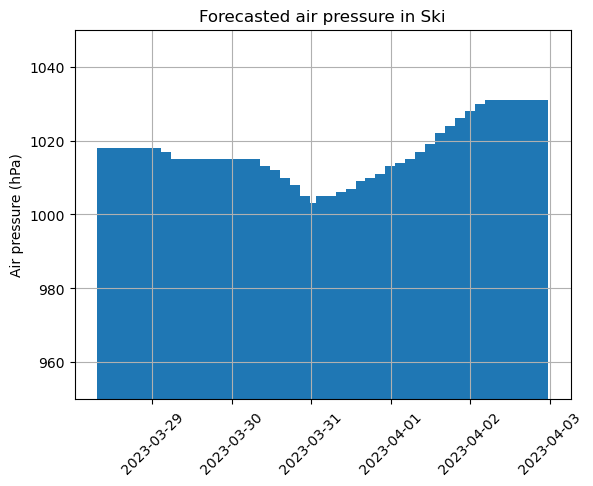

In [38]:
import matplotlib.pyplot as plt
plt.bar(timestamps, pressures)
plt.xticks(rotation=45)
plt.ylim(950, 1050)
plt.grid()
plt.ylabel("Air pressure (hPa)")
plt.title(f"Forecasted air pressure in {CITY}")
plt.show()

In [39]:
rain = []
snow = []
for forecast in responseF["list"]:
    try: # Check if rain is present in forecast
        rain.append(forecast["rain"]["3h"])
    except KeyError:
        rain.append(0)
    try: # Check if snow is present in forecast
        snow.append(forecast["snow"]["3h"])
    except KeyError:
        snow.append(0)

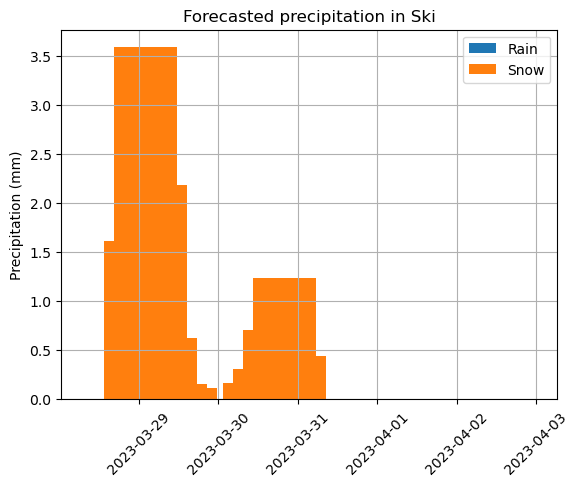

In [40]:
# Stacked bar chart with rain and snow
plt.bar(timestamps, rain, label="Rain")
plt.bar(timestamps, snow, label="Snow")
plt.xticks(rotation=45)
plt.grid()
plt.ylabel("Precipitation (mm)")
plt.title(f"Forecasted precipitation in {CITY}")
plt.legend()
plt.show()
